
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

** Limitations are mentioned as Disclaimers in markdown cells as we go

** Functions are underlined

<a id='intro'></a>
## Introduction

### Dataset Description 


#### In this project, I investigate TMDb movie dataset. This database provide various metrics that identify the movie as well as information regarding the crew involved in making each movie,as well as the budget and revenue involved. It also highlights the masses opinion of each movie through multiple variables. Below, I elaborate on the varibales involved in the database and what each value represents.


##### Variables: (Total:21) 

     - 'id'--> unique identifier for each movie
     - 'imdb_id'--> unique identifier for each record of movie on imdb
     - 'original_title'--> movie's title
     - 'homepage'--> a link to the movie's website
     - 'tagline' --> catchphrase of the movie 
     - 'keywords'--> added by the audience  
     - 'overview'--> short description of the movie's plot
     - 'genre'--> the category the movie falls into
     - 'runtime'--> how long the movie is in minutes
     - 'releast_date'--> the day the movie was released M/D/Y
     - 'release_year'--> the year the movie was released 
     - 'cast'--> the actors that appeared in the movie
     - 'director'--> the name of the director
     - 'production_companies'--> the production companies involved in the movie
     - 'budget'--> the cost of the movie from production point of view
     -'revenue'--> the boxoffice revenues of the movie
     -'budget_adj'--> budget scaled to the year 2010, taking in consideration the value of the currency and inflation
     -'revenue_adj'--> revenue scaled to the year 2010, taking in consideration the value of the currency and inflation
     -'popularity'--> represent various factors such as the number of views per day, number of people who "favorite"-ed the movie or added it to their "watchlist"
     -'vote_count'--> integer value that represents the number of people who rated the movie
     -'vote_average'--> the mean of all votes 


### Question(s) for Analysis

#### 1) What are the characteristics of high revenue [>75%] movies ? Compared to budget, average count and release year

#### 2) Effect of time of release (holidays/weekends) on the number of profiting movies released per yer and over all years

#### 3) The trend of budget,revenue,popularity and vote count on movies with several parts (sequels or remakes) 

In [1]:
#Set up import statements for all of the packages used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from difflib import SequenceMatcher


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.0.0

Requirement already up-to-date: pandas==1.0.0 in /opt/conda/lib/python3.6/site-packages (1.0.0)


<a id='wrangling'></a>
## Data Wrangling


#### General Properties

In this cell, Inspect for each column:

     1) datatype
     2) missing values
     3) number of zerovalues  

In [3]:
# Loading database
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv',index_col='id')
display(df.head(3))

#Inspect data types and look for instances of missing or possibly errant data.
max_entries=df.nunique().max()
print("Maximum number of unique entries=",max_entries,'\n')

cols=df.columns.tolist()
print("Each Column's unique entries, types & number of zeros: \n")
for col in cols:
    print("{}   {} {}s , {} zeros".format(col,df[col].nunique(),df.dtypes[col],(df[col]==0).sum()));


,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Maximum number of unique entries= 10855 

Each Column's unique entries, types & number of zeros: 

imdb_id   10855 objects , 0 zeros
popularity   10814 float64s , 0 zeros
budget   557 int64s , 5696 zeros
revenue   4702 int64s , 6016 zeros
original_title   10571 objects , 0 zeros
cast   10719 objects , 0 zeros
homepage   2896 objects , 0 zeros
director   5067 objects , 0 zeros
tagline   7997 objects , 0 zeros
keywords   8804 objects , 0 zeros
overview   10847 objects , 0 zeros
runtime   247 int64s , 31 zeros
genres   2039 objects , 0 zeros
production_companies   7445 objects , 0 zeros
release_date   5909 objects , 0 zeros
vote_count   1289 int64s , 0 zeros
vote_average   72 float64s , 0 zeros
release_year   56 int64s , 0 zeros
budget_adj   2614 float64s , 5696 zeros
revenue_adj   4840 float64s , 6016 zeros



### Data Cleaning
 
In this cell:

1) Remove duplicates

2) Drop cols that aren't helpful
    
- imdb_id-> redundant since i use id as the unique identifier for a movie
- tagline-> it's hard to identify anything from one phrase
- overview-> a bulk of sentences not really suitable for inter-variables analysis
- keywords-> according to imdb.api, these are audience tags used to describe a movie, not systematic info
- homepage-> Could be useful to parse the missing data - for now i won't use it
- director-> I won't use it although it could be useful to find correlation between certain names and popularity
- budget & revenue -> the 2010 version are more representative for comparisons 

3) Lowercase 

4) Remove whitespace 

5) Rename revenue_adj and budget_adj to revenue10,budget10

In [4]:
 
#remove duplicates
df=df.drop_duplicates() #Drop any duplicates in data

#decide on columns that aren't helpful in my analysis to drop them.
df.drop(columns=['imdb_id','tagline','overview','keywords','homepage','director','budget','revenue'],inplace=True)

df = df.applymap(lambda s: s.lower() if type(s) == str else s) #makesure all columns and str values are lowercase
df = df.applymap(lambda s: s.strip() if type(s) == str else s) #strip any whitespace at the beginning and end of strings

df.rename(columns={"budget_adj": "budget10", "revenue_adj": "revenue10"},inplace=True)

6) Missing data handeling (NaNs)

In [5]:
##MISSING DATA HANDELING 

cols_w_nans=df.columns[df.isnull().any()].tolist() 
#'cast,genres,production_companies' --> explore Each to figure out course of action

genre_missing=df[df['genres'].isna()].shape[0] #23 is a small number so drop lines where genres is na 

prod_companies_missing=df[df['production_companies'].isna()].shape[0] #1030 entries is alot of data to drop --> delete this column 

cast_missing=df[df['cast'].isna()].shape[0] #76 entries  

print("{} columns have missing values of {},{} and {} respectively.".format(cols_w_nans,cast_missing,genre_missing,prod_companies_missing))

['cast', 'genres', 'production_companies'] columns have missing values of 76,23 and 1030 respectively.



In the previous cell, it's shown that the three columns cast,genres and production companies have missing values. 

In the next cell, we proceed to handle the missing NaNs

    6a) genres: 23 entries is significant relative to the size of the df, hence we can pop rows where geners is NaN
    
    6b) production_companies: 1030 is alot of data to pop their entire rows,hence drop this column altogether
###### ** It might be good to parse the homepage for the missing data

In [6]:

df=df.dropna(subset=['genres'])
df.drop(columns=['production_companies'],inplace=True)


In the next cell, we continue handling missing NaNs

    6c) cast: 76 entries.. Upon further inspection (1st line in the next cell), Most of the missing data is in the genres animation or documentary
    Hence, I decided to update the missing values with suitable data
        - "voice_over" for missing values in "animation" genre
        - "narrating" for documentaries since they don't really have casts 
        
    Also, I dropped the rows where genre is not animation/narrating


In [7]:
nan_casts=df[df['cast'].isna()]['genres']

#animation
anim=nan_casts.str.contains('animation').tolist()
nan_casts.loc[anim].index
df.loc[nan_casts.loc[anim].index,'cast'] = 'voiceover'
#documentary
docu=nan_casts.str.contains('documentary').tolist() 
nan_casts.loc[docu].index
df.loc[nan_casts.loc[docu].index,'cast'] = 'narrating'

df=df.dropna(subset=['cast'])

#to make sure there are no longer missing info in the dataframe
df.columns[df.isnull().any()].size 


0

7) In the following cell, I need to be able to explore statistics of each genre, So i need to apply the explode function. However I need to wrangle genres column to be comma-seperated first 
- Split genres by ',' instead of '|'
- Create new data frame that use explode to create seperate rows for each genre 

In [8]:
#I use explode to create seperate rows for each genre mentioned
#This would come handy in analaysis related to genres and to the next section of data cleaning

df['genres']=df['genres'].str.split(pat="|")

df_new=df.explode('genres')
df_new.reset_index(inplace=True)
df_new.head(3)


,id,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget10,revenue10
0,135397,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,124,action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,124,adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,124,science fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09



8) Zeros -instead of descriptive data- handeling

    I investigate values where Zeros exist instead of data to try and decide on a course of action!
    As shown in a previous cells, these cols are: 
        - revenue10
        - budget10
        - runtime
   
- Part A:computes appropriate values in the "exploded" dataframe df_new because it uses genres to differentiate movies.

    <u> budget10 & revenue10 </u>

    I don't want to delete the rows with missing values since that would cost me almost half the database. Therfore, I opt to fill this data,I group data according to genres and based on whether the revenue is skewed or not, I fill the zeros by the mean/median of the revenue/budget for this genre.
** https://towardsdatascience.com/handling-missing-data-12ac7c59eebc

In [9]:

genres=df_new['genres'].unique()
for genre in genres:
    r_subgrp=df_new.groupby('genres').get_group(genre)['revenue10']
    r_subgrp_nozeros=r_subgrp[r_subgrp!=0]
    r_skew=np.absolute(r_subgrp_nozeros.skew())#.skew()
    r_value=r_subgrp_nozeros.mean() if r_skew<0.5 else r_subgrp_nozeros.median()    
    indices=df_new.query('genres==@genre & revenue10==0').index.tolist()
    df_new.at[indices,'revenue10']=r_value
    #df_new.loc[indices,'revenue10']=r_value
    
    b_subgrp=df_new.groupby('genres').get_group(genre)['budget10']
    b_subgrp_nozeros=b_subgrp[b_subgrp!=0]
    b_skew=np.absolute(b_subgrp_nozeros.skew())#.skew()
    b_value=b_subgrp_nozeros.mean() if b_skew<0.5 else b_subgrp_nozeros.median()    
    indices=df_new.query('genres==@genre & budget10==0').index.tolist()
    df_new.at[indices,'budget10']=b_value
    #df_new.loc[indices,'budget10']=b_value


- Part A:

   <u> runtime </u> 
    
   As for zeros in the runtime coumn, I took in consideration both "genres" and "release_year", since i believe that over time audeince's preference of movies' runtime changed.
    
###### **I didn't take release_year in consideration because of the budget10 & revenue10 variables that are scaled to the year 2010 taking in consideration inflation of currencies


In [10]:

a=df_new.query('runtime!=0').groupby(['genres','release_year']).skew(axis = 0, skipna = True).abs()['runtime']

#prepare medians for groups of (genres, release_years) that have data skewed 
a[a>=0.5]=df_new.query('runtime!=0').groupby(['genres','release_year']).median()['runtime']

#prepare means for groups of (genres, release_years) that have data skewed 
a[a<0.5]=df_new.query('runtime!=0').groupby(['genres','release_year']).mean()['runtime']

list_rzeros=list(df_new.query('runtime==0').groupby(['genres','release_year']).indices.keys())
for r in list_rzeros:
    indices_r=df_new.query('genres==@r[0] & release_year==@r[1] & runtime==0').index.tolist()
    toinsert_runtime=a[r[0],r[1]]
    df_new.loc[indices_r,'runtime']=toinsert_runtime

8) 
- Part B: update original df with computed revenues, budgets, runtimes
    
   In order to that, i need to have a unique value of budget10,revenue10 and runtime to incorporate in the original dataframe that has genres (not-exploded). So before i update the original dataframe, I use mean of the values computed for the same id if the movie is under multiple genres

In [11]:

return_to_df=df_new.groupby('id').mean()[['runtime','budget10','revenue10']]#.query('id==7006')
indd=df_new.groupby('id').mean()[['runtime','budget10','revenue10']].index.tolist()

df.loc[indd,'runtime']=return_to_df['runtime'].values
df.loc[indd,'revenue10']=return_to_df['revenue10'].values
df.loc[indd,'budget10']=return_to_df['budget10'].values


9) In the next cell:
- use datetime package to tell if a day falls in a weekend or not (this'll come handy in Q2)
- removed the year from the release date because it's already covered in release_year 


In [12]:
dates=pd.to_datetime(df['release_date'], infer_datetime_format=True)#
weekend_ornot=dates.dt.dayofweek 
df['release_date']=df['release_date'].str.rsplit(pat='/',n=1).str.get(0)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: What are the characteristics of high revenue <u> >75% </u> movies ?
#### Setup of data for q1

In [13]:
high_profit=df.describe()['revenue10']['75%']
df_profit=df.query('revenue10>=@high_profit')

p_corr=df_profit.corr(method='pearson')['revenue10']
print('Pearson correlation with revenue=')
display(p_corr)

#Can't use seaborn because it takes a long time to run on a big dataset!
#import seaborn as sns
#sns.pairplot(df_profit, y_vars="revenue10", x_vars=df_profit.columns.values)


Pearson correlation with revenue=


popularity      0.532995
runtime         0.270695
vote_count      0.639213
vote_average    0.267123
release_year   -0.070023
budget10        0.495100
revenue10       1.000000
Name: revenue10, dtype: float64

In the previous cell,
- I filtered the data where the revenue10 is bigger than 75% percentile, which is what the question means by High revenue data
- I stated the pearson correlation to decide what variables I'll study it's effect on revenue

##### 1) How does the budget affect high revenue movies?
 

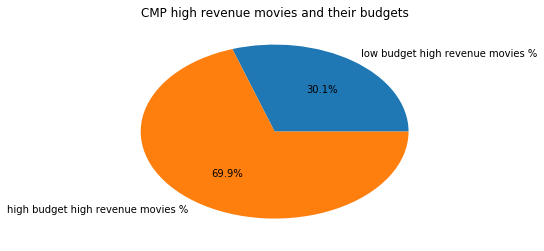

In [14]:
#1) budget
budget_75=df.describe()['budget10']['75%']
hprofit_hbudget=df_profit.query('budget10>=@budget_75').groupby('budget10').count().sum()['popularity']

hprofit_pie=[df_profit.shape[0]-hprofit_hbudget,hprofit_hbudget]
mylabels=['low budget high revenue movies %','high budget high revenue movies %']
plt.pie(hprofit_pie, labels = mylabels,autopct='%1.1f%%');#, explode = myexplode)
plt.title('CMP high revenue movies and their budgets');
plt.show()


As expected, it takes money to make money. This is confirmed through the previous cell and the pie chart that clearly shows almost 70% of high revenue movies require production to exceed 75% of the whole database of movies.

##### 2) Does high budget necessarily mean high popularity though? Check the next cell for the results

Correlation between popularity & revenue= 0.53


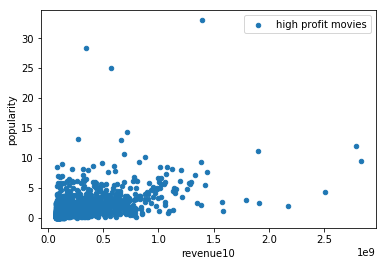

In [15]:
pr_corr=df_profit['popularity'].corr(df_profit['revenue10'])
print('Correlation between popularity & revenue= {:.2f}'.format(pr_corr))

df_profit.plot.scatter(x='revenue10', y='popularity',label = 'high profit movies')
plt.legend()
plt.show()

According to the previous scatter plot:
- There are outliers in the revenue10 data that are not representative to the mode of the rest of the movies
- The answer to the question of whether high budget=high popularity is No! The varables don't seem causated.

Which raises the question, <u> which variable affects the popularity entity? </u>

According to the description of the variable on Tmdb, it reflects various factors such as the number of views per day, number of people who "favorite"-ed the movie or added it to their "watchlist". I'd say vote_count is the closest information to this description. The next cell confirms this by high correlation between the two variables(revenue10 & vote_count) for high profit movies


Correlation between popularity & vote count= 0.77


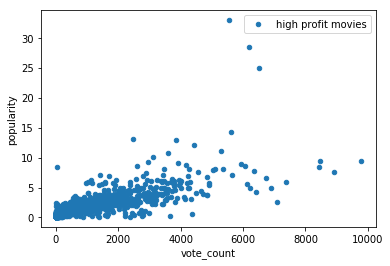

In [16]:
pv_corr=df_profit['popularity'].corr(df_profit['vote_count'])
print('Correlation between popularity & vote count= {:.2f}'.format(pv_corr))

df_profit.plot.scatter(x='vote_count', y='popularity',label = 'high profit movies')
plt.legend()
plt.show()

##### 3) How does average count compare to revenue of high-profit movies? 

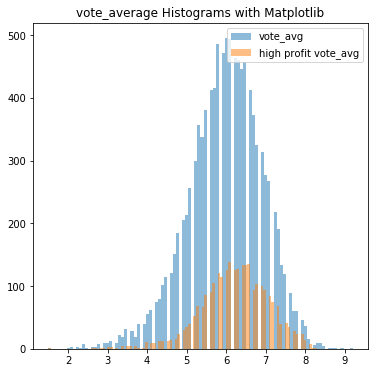

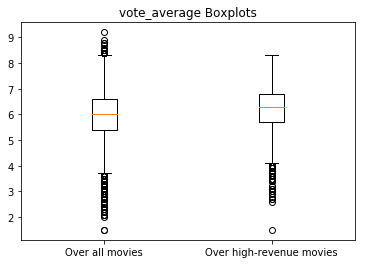

All movies:stats of vote_average


count    10839.000000
mean         5.973844
std          0.934244
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

High-profit movies: stats of vote_average


count    2710.000000
mean        6.214317
std         0.858937
min         1.500000
25%         5.700000
50%         6.300000
75%         6.800000
max         8.300000
Name: vote_average, dtype: float64

In [17]:
votes=[df['vote_average'],df_profit['vote_average']]
#HISTOGRAM
plt.figure(figsize=(6,6))
plt.hist(df['vote_average'], bins=100, alpha=0.5, label="vote_avg");
plt.hist(df_profit['vote_average'], bins=100, alpha=0.5, label="high profit vote_avg");
plt.title("vote_average Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.show()

#HANDELING A WARNING FOR CREATING THE VARIABLE VOTES
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)    

#BOXPLOT
plt.boxplot(votes)
plt.xticks([1, 2], ['Over all movies', 'Over high-revenue movies'])
plt.title("vote_average Boxplots")
plt.show()

print('All movies:stats of vote_average')
display(df.describe()['vote_average'])

print('High-profit movies: stats of vote_average')
display(df_profit.describe()['vote_average'])


- As shown by the distribution of average_count for all movies vs distribtion of average_count for high profit movies,the distribution is more or less untact, meaning that filtering the high profit movies didn't skew the distribution of their revenues! 
- In the box plot, 
1) there's slightly less variation in the statistics of high profit movies (tighter box)
2) It's also shown that +ve outliers that are shown in the box_plot over the entier database aren't present in the filtered high_profit box plot which means that some of the highly voted_movies are made with smaller budgets!
3) The negative outliers are common in the two box plots which i take to mean that some of the highly profitable movies are under-voted (under-estimated too)

#### Q2: Effect of time of release of movies (holidays/weekends) on the number of movies released per yer and over all years

- Why did i choose the second question to be dependant on release_year? 

In the next cell, the answer comes in the form of a histogram that shows how much the year of release affects the count of movies released.

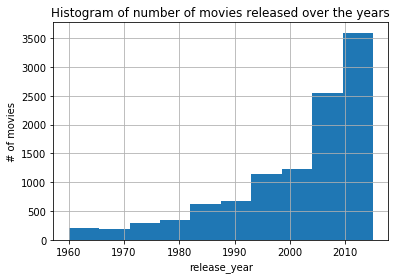

In [18]:
fig = plt.figure();
ax = fig.gca();
df['release_year'].hist(ax = ax);
plt.title("Histogram of number of movies released over the years");
plt.xlabel("release_year");
plt.ylabel("# of movies");

#### Q2 data setup 
- Append two cols 

    1) weekend/not
    
         I define a list of holidays in the US, assign 1s where release_date coincide with that list and 0s otherwise
    **https://www.timeanddate.com/holidays/us/?hol=25
    
    2) holiday/not
    
        This depends on 9) in datawrangling section, each day of the week is labeled by an integer, so i check if the int>4 meaning it's either Saturday or Sunday and assign holiday/not bool accordingly
        
###### ** I use USA for deducing the holidays and weekends (saturday/sunday). However, for more percision I should use production companies, locate them and use holidays and weekends according to the country it was released in. 
   

In [19]:

holidays=['1/1','1/17','2/14','2/21','3/17','4/17','4/18','5/5','5/8','5/30','6/14','6/19','6/20','7/4','9/5','10/10','10/31','11/8','11/11','11/24','12/24','12/25','12/26','12/31']

df['holiday/not'] = [0] * len(df.index)
holiday_or_not=df['release_date'].isin(holidays)   
df.loc[holiday_or_not,'holiday/not']=1

df['weekend/not']= [0] * len(df.index)
weekends_ind=weekend_ornot[weekend_ornot>4].index.tolist() 
df.loc[weekends_ind,'weekend/not']=1

#### Q2 analysis 
In the next cell, 

1) filter data of interest--> Movies that makes profit (aka revenue?budget) 

2) find count of movies in each of the following grps (weekens,holidays,both,non) to see if a certain group is popular with movies that made profit

In [20]:

df_profiting=df.query('revenue10>budget10')

r=df_profiting.groupby(['weekend/not','holiday/not','release_year']).count()['popularity']
# This line is used to stack 0s in years where for instance no movies where mad in weekends, this will come handy in plotting
r=r.unstack(fill_value=0).stack()

per_year=df_profiting.groupby('release_year').count()['popularity']#.tolist()
years=df_profiting['release_year'].unique()

neither_nor=r[0,0,]/per_year
on_weekends=r[1,0,]/per_year
on_holidays=r[0,1,]/per_year
on_both=r[1,1,]/per_year



#### Q2 plot and results 

The next plot is per-year, so the counts are normalized to total number of movies released per year

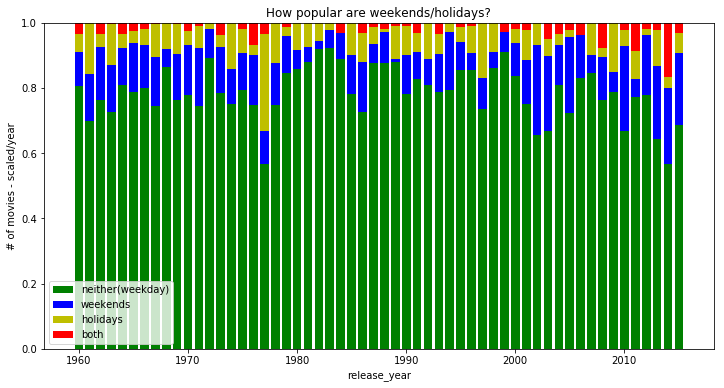

In [21]:

plt.figure(figsize=(12,6))
plt.bar(years, neither_nor, color='g')
plt.bar(years, on_weekends, bottom=neither_nor, color='b')
plt.bar(years, on_holidays, bottom=neither_nor+on_weekends, color='y')
plt.bar(years, on_both, bottom=neither_nor+on_weekends+on_holidays, color='r')
plt.xlabel("release_year")
plt.ylabel("# of movies - scaled/year")
plt.legend(["neither(weekday)", "weekends","holidays", "both"])
plt.title("How popular are weekends/holidays?")
plt.show()


The bar chart above shows how movie releases' are distributed among each year. It's easy to spot that on year 1977, almost 50% of movies released where released between holidays,weekends or both!

In the following chart, we also look at the count of movies in general,regardless the year.

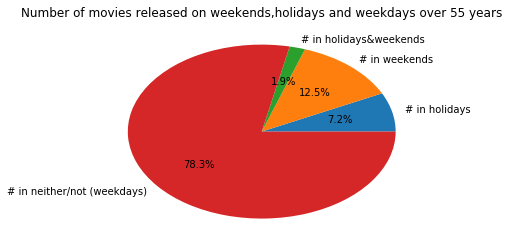

In [22]:

mylabels=['# in holidays','# in weekends','# in holidays&weekends','# in neither/not (weekdays)']
plt.pie([(on_holidays*per_year).sum(),(on_weekends*per_year).sum(),(on_both*per_year).sum(),(neither_nor*per_year).sum()], labels = mylabels,autopct='%1.1f%%');#, explode = myexplode)
plt.title('Number of movies released on weekends,holidays and weekdays over 55 years');


### Q3) Trend/pattern of budget,revenue,popularity and votes count on movies with several parts (sequels or remakes) 

###### ** This question mainly stems from my trial to parse through text data to find identifiers 
(words--> 'part' or 'and'  , chars--> ' , ' or ' : ' )  

- In the next cell, I sort data according to title so that closely similar titles are closely located (for easier search)

- Two functions are defined
      
    <u> similar function:</u> uses sequence matcher function to compare the titles of movies 

    <u> sequels function:</u> tries to find PAIRS of movies whose original_title are highly similar (aka sequels or remakes)
    It investigtes two markers for data:
    
    - contains ':' so it compares the str prior to ':' to other titles  
    
    - contains neither and compares the whole str of titles
    
    
###### ** Important Disclaimer regarding sequels function: this function captures alot of sequels, YET it also misses alot (e.g. there should be analysis for titles that are closely similar around the words 'and' and 'part' to catch franchise such as (Harry potter and .. )
Accordingly, Q3 compares the successfully fetched sequels and attempts no comparison to the rest of the dataset since movies not captured <u> are not necessarily a 1-part movie </u>

In [23]:
def similar(a, b):
    #Sequence matcher compares two strs
    return SequenceMatcher(None, a, b)#.ratio()

def sequels(a,a_ind):
    stop=0
    ind_sequels = np.zeros((len(a),2))
    for i in range(len(a)-1):
        j=i+1
        ratio=similar(a[i],a[j]).ratio() #similar.ratio returns a number bet 0 and 1 showing how similar two strs are
        condA=':' in a[i]
        condB=' part ' in a[i]
        condC=' and ' in a[i] 
        cond=(condA or condB)
        
        if cond==0 and ratio>0.85 and ratio<1:
            sim=similar(a[i],a[j]).find_longest_match(alo=0, ahi=len(a[i]), blo=0, bhi=len(a[j]))
            #find_longest_match return the longest stream of chars similar between two strings
            #sim[0]=beg of match in 1st str, sim[1]= beg of match in 2nd str,sim[2]=len of match
            
            cond1=(sim[0]==0 and sim[1]==0 and a[i][sim[2]-sim[0]].isalpha()==0)
            #cond1: if the start of 2 strs match AND the match is bet Full words 
            #(aka the first char after the match is not alphabetic)
            
            cond2=a[j] in a[i] and a[i][sim[2]-sim[0]].isalpha()==0
            #cond2: if a str is part of the other AND the str included in the other is alphabetical(not numbers or punctuation)  
            
            if (cond1 or cond2):
                #print(a_ind[i],a_ind[j]) **********USE THIS LINE TO SEE SEQUELS PARSED
                ind_sequels[i,0]=a_ind[i]
                ind_sequels[i,1]=a_ind[j]
                
        elif condA==1:
            # if : is in the strs, compare the chars before the :, because it's most probably the common identifier of a franchise
            bi=a[i].split(':')[0]
            bj=a[j].split(':')[0]
            ratio2=similar(bi,bj).ratio()
            sim=similar(bi,bj).find_longest_match(alo=0, ahi=len(bi), blo=0, bhi=len(bj))
            if ratio2>0.8: 
                #print(a[i],a[j]) **********USE THIS LINE TO SEE SEQUELS PARSED
                ind_sequels[i,0]=a_ind[i]
                ind_sequels[i,1]=a_ind[j]
                
    return ind_sequels    

a=df.sort_values(by='original_title',ascending=False)['original_title'].values.tolist()
a_ind=df.sort_values(by='original_title',ascending=False)['original_title'].index.tolist()

tst=sequels(a,a_ind).tolist()    
dfr=pd.DataFrame(tst,columns=['col1', 'col2']) #put the pais in a df



- In the next cell, I zip the pair into a tuple, since i need to compare the second element of a tuple to the first of the subsequent pairs

- This way is easier than comparing an element of a col to elements of another col and next rows.


In [24]:
df_s=dfr.loc[~(dfr==0).all(axis=1)]
aa = df_s.col1
b = df_s.col2
x = zip(aa, b)
xx=tuple(x)

- In this cell,I work on the pairs of sequels previously captured to form a record of all parts of a movie
- To do so, i attempt to find intersections between subsequent pairs -remember these pairs come from ordered titles so i won't have to look beyond one pair below the one at hand to tell if it has sequels or prequels
- When i do find intersections, I union the two pairs into one record


In [25]:
df_ss=pd.DataFrame()
zt=[]
skip=0
for z in range(len(xx)-1):
    if(skip>0):
        skip=skip-1
        continue
    else:    
        it=1
        union=xx[z]
        while(it>0):
            if len(set(union) & set(xx[z+it]))>0:
                union=tuple(set(union+xx[z+it]))
                it=it+1
                skip=skip+1
            else:
                it=0            
    zt.append(union)
df_ss=pd.Series(zt)    

- Data frame to work on (rania) is appended with a column [id_sequels] that represent a unique id for each franchise of movies

In [26]:
rania=df.sort_values(by='original_title',ascending=False)#['original_title']#print(df_ss) ,max(df_ss, key=len)

rania.loc[:,'id_sequels']=0
for r in range(len(df_ss)):
    for z in range(len(df_ss[r])):
        rania.loc[int(df_ss[r][z]),'id_sequels']=r

rania=rania.drop(rania.query('id_sequels==0').index.tolist())        


- In the next cell I scale the quantities <u>revenue, budget,popularity and vote_average </u> of the oldest movie of each franchise to 1 and <u> revenue, budget,popularity and vote_average </u> of the rest of the franchise is normalized according to the oldest, for every franchise.

In [27]:
g=rania.groupby(['id_sequels'])
cols=['revenue10','budget10','popularity','vote_count']
for r in range(1,len(df_ss)):
    a=g.get_group(r).sort_values(by='release_year',ascending=True)
    a_r=[]
    for col in cols: 
        a_r=a[col].tolist()
        a[col]=np.divide(a_r, a_r[0])
    
    locs=a.index.tolist()
    rania.loc[locs,cols]=a[cols]


- In the next cell i prepare data for plotting

<u> extract_perpart function </u> 
    
    1) gets the order of the movie within a franchise - extension of the attributes groupby.first() for all elements 
    2) appends zeros to have evenly sized arrays for plotting e.g. there's a movie of 7 parts so for movies of two, append 5 zeros
    
##### ** Disclaimer I use np and lists in this cell, hence it's execution time is noticable

In [28]:
norm_cols=rania[['id_sequels','release_year','revenue10','budget10','popularity','vote_count']]
maximum_parts=max(rania.groupby(['id_sequels']).count()['popularity'].tolist())

tst=rania.groupby(["id_sequels"]).apply(lambda x: x.sort_values(["release_year"], ascending = True))#.reset_index(drop=True)

r_graph=np.zeros((maximum_parts,norm_cols['id_sequels'].nunique()))
b_graph=np.zeros((maximum_parts,norm_cols['id_sequels'].nunique()))
p_graph=np.zeros((maximum_parts,norm_cols['id_sequels'].nunique()))
v_graph=np.zeros((maximum_parts,norm_cols['id_sequels'].nunique()))

len_grp=norm_cols.groupby(['id_sequels']).count()['popularity'].values.tolist()


def extract_perpart(tst,c):
    graph1=np.zeros((maximum_parts,norm_cols['id_sequels'].nunique()))
    for z in range(maximum_parts):
        #c='revenue10'
        tmp=[]
        for t in range(1,tst['id_sequels'].nunique()+1):
            r=tst.loc[t,c].tolist()
            if z<len_grp[t-1]:
                tmp.append(r[z])
            else:
                tmp.append(0)
        graph1[z,:]=tmp
    return graph1

r_graph=extract_perpart(tst,'revenue10')
b_graph=extract_perpart(tst,'budget10')
p_graph=extract_perpart(tst,'popularity')
v_graph=extract_perpart(tst,'vote_count')

#### Q4 plots

-  In comparing franchise, I figured that it's unfair to compare a sequel of 2 movies with a movie of 10 parts for instance, Hence, i compare movies with the same # of parts together (e.g. trioloigies are compared with each other)

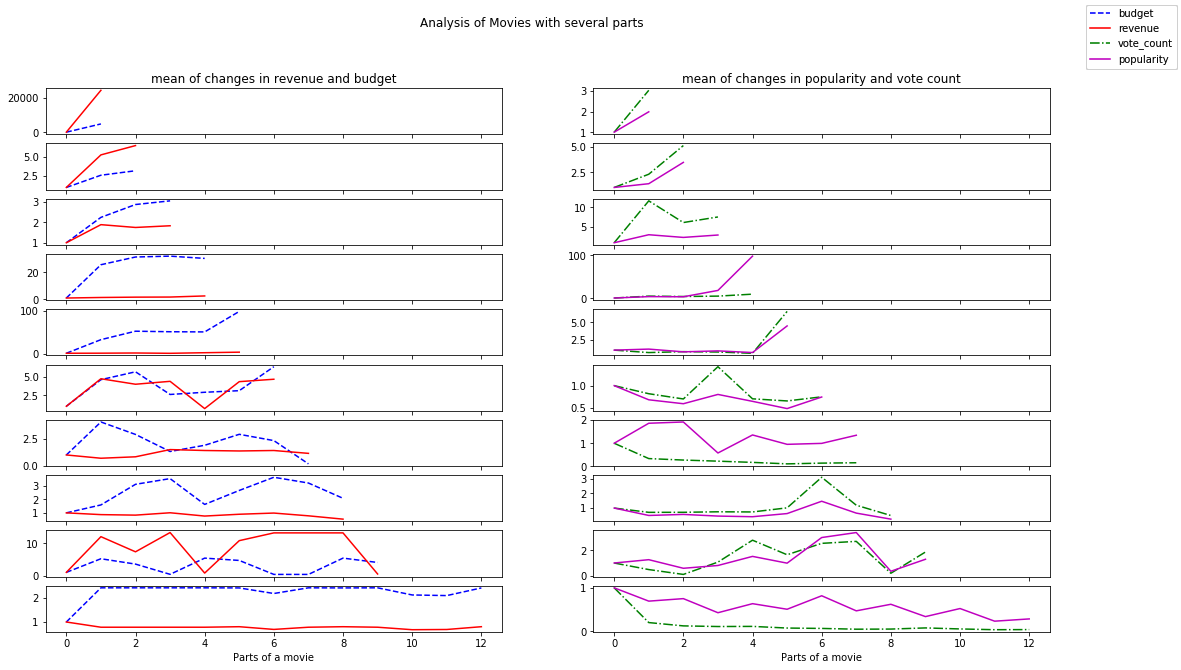

In [29]:
dd=np.unique(len_grp)

def pop_zeros(items):
    while items[-1] == 0:
        items.pop()
    return items

match_len=np.zeros((len(dd),norm_cols['id_sequels'].nunique()))
for i in range(1,norm_cols['id_sequels'].nunique()):
    lstrip=pop_zeros(b_graph[:,i-1].tolist()) #any graph not necessarily b_graph can be r v p 
    pos=np.where(dd==len(lstrip))
    match_len[pos,i]=i-1

figure, axes = plt.subplots(nrows=len(dd), ncols=2,figsize=(18, 10),sharex=True, sharey=False)

for i in range(len(dd)):

    to_plt_ind=match_len[i,match_len[i,:]!=0].astype(int)
    
    xb=b_graph[:,to_plt_ind].transpose()
    xb_mean=pop_zeros(xb.mean(0).tolist())

    xr=r_graph[:,to_plt_ind].transpose()
    xr_mean=pop_zeros(xr.mean(0).tolist())
    
    xv=v_graph[:,to_plt_ind].transpose()
    xv_mean=pop_zeros(xv.mean(0).tolist())
    
    xp=p_graph[:,to_plt_ind].transpose()
    xp_mean=pop_zeros(xp.mean(0).tolist())
    
    axes[i, 0].plot(xb_mean,'b', label = "budget", linestyle="--")
    axes[i, 0].plot(xr_mean,'r', label = "revenue", linestyle="-")
    
    axes[i, 1].plot(xv_mean,'g', label = "vote_count", linestyle="-.")
    axes[i, 1].plot(xp_mean,'m', label = "popularity", linestyle="-")

    if i==0:
        axes[i,0].set_title("mean of changes in revenue and budget", loc='center')
        axes[i,1].set_title("mean of changes in popularity and vote count", loc='center')
    elif i==len(dd)-1:
        axes[i,0].set_xlabel("Parts of a movie")
        axes[i,1].set_xlabel("Parts of a movie")
        
    figure.suptitle("Analysis of Movies with several parts")
    figure.legend()
    

#### Q3 plots observations

##### Means of budgets and revenues
- It's a relatively safe bet to make a second and third part of a movie, afterwards it's a gamble.

**Disclaimer: <u> Although we previously normalized the quantities wrt to the original_part, the y-ticks are ridiculously irregulr, this is due to several factors to name a few
    1) some revenues and budgets provided are clearly faulty or use a different currency or is missing a few millions (ex 40 thousand not 40) etc. This made no difference in the previous analysis because we hadn't compared specific movies against each other, so if a part has faulty revenue (3 digit) and the sequel has normal budget (6 digits),the normalizing of this movie would over-ride the mean of the rest of normalized revenues
    2) Another reason could be the filled -in values of budgets and revenues, that were based on generic statistics across genres and release_years </u>

##### Means of popularity and vote_count
- There's not much intake from these plots except confirming the obvious causation between vote_count and popularity
- Also the trends of popularity and revenue kind-of work along each other -if you look across each row of the two plots

**Disclaimer <u> the same as previous one but only for bullet point 1, since the vote_count column had no missing data to fill-in </u>


<a id='conclusions'></a>

## Conclusion

In this analysis, I attempted to analyze tmdb movie dataset to derive conclusions/observations regarding various central questions. 
In the data wrangling section, I attempted to fill missing values depending on the factors I found fitting. For the revenue and budget values, I think genres play an important role in determining the range -at least- of budgets and revenues. Appropriate stastics (skew,median,mean) where used to fill in those values instead of removing the data of their movies altogether. As for runtime, similar approach was followed, however this time the year of the movie's release played a part as well since movies (and songs for that matter) grew shorter over time.
 
The first question was related to movies that lie in the higher percentile of revenues.It's observed that budgets that are in the higher percentile (75%) take up 70% of pie-chart of the high-profit movies. The average of people's votes and popularity showed little to no-effect on revenues of movies, which makes sense if we think of revenue as short-term rubric for a movie's success, but has no effect on how well a movie ages. Many movies where critically acclaimed movies and made no revenues and vice versa. Further inspection in this question could include parsing the homepage of each movie to retrieve missing data in production companies and cast, since for sure some names are associated with successful movies.

The little-to-non effect of vote_count and popularity made more sense when the correlation between vote_count and popularity was confirmed through pearson correlation (0.77) and the scatter plot showed positive correlation between the two variables. 

The second question focused on the huge effect of years on movies' count. Data wrangling was necessary to identify weekends and holidays throughout the years and then attempt to concisely present a bar chart that easily spots the years where proudction companies focused on holidays and weekends to release their movies. I used US holidays and weekends as a reference although there are foreign movies and titles that aren't in english, so deriving these answers depend on my assumption that at least most of those movies are american hence comply to US's calender. 

The third and last question was more of a quest to parse through the original movies' titles to find sequels or remakes. This function serves as a starting point, but should be much more polished to capture all sequels and absolutely discard the rest. Since this level of confidence isn't where I'm at, I avoided misleading results by focusing my analysis on the sequels I did find. Grouping them in terms of the number of sequels found and displaying the mean of several statistics budget,revenue,popularity and vote_count.


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0